# Ames Housing Analysis - EDA

### Imports

In [1]:
# ALL The Imports:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns 
import missingno as msno


# SKlearn imports:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn import set_config
set_config(display = 'diagram')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load Data and Perform EDA

In [2]:
house_train = pd.read_csv('./data/train.csv')

In [3]:
house_test = pd.read_csv('./data/test.csv')

In [4]:
house_train.columns = house_train.columns.str.lower()

In [5]:
house_test.columns = house_test.columns.str.lower()

In [6]:
house_train.head(2)

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [7]:
house_train.shape

(2051, 81)

In [8]:
house_test.shape

(878, 80)

#### Removing two outlier houses with sq ft > 5000, but far below expected price.

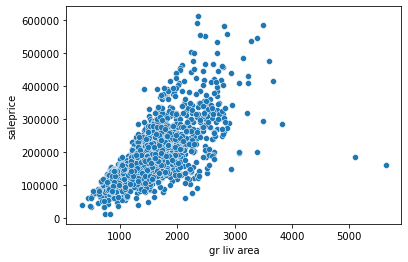

In [9]:
house_train = pd.read_csv('./data/train.csv')
house_train.columns = house_train.columns.str.lower()
sns.scatterplot(x = house_train['gr liv area'], y = house_train['saleprice'])
plt.savefig('./charts/outliers');

In [10]:
house_train = house_train.sort_values(by='gr liv area', ascending=False)
house_train = house_train.iloc[2:2051]

Confirming outliers were removed.

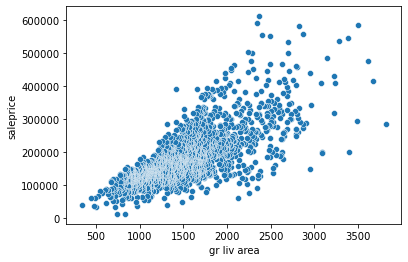

In [11]:
sns.scatterplot(x = house_train['gr liv area'], y = house_train['saleprice']);

#### Checking average sale price by year to see if housing meltdown impacts prices

In [12]:
house_train.groupby(house_train['yr sold'])['saleprice'].mean()

yr sold
2006    179471.609589
2007    185527.883300
2008    181800.488479
2009    182455.244395
2010    174180.059829
Name: saleprice, dtype: float64

In [13]:
house_train.sort_values(by = 'gr liv area', ascending = False).head(2)

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1897,2738,905427030,75,RL,60.0,19800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2.5Unf,6,8,1935,1990,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,425.0,Unf,0.0,1411.0,1836.0,GasA,Gd,Y,SBrkr,1836,1836,0,3672,0.0,0.0,3,1,5,1,Gd,7,Typ,2,Gd,Detchd,1993.0,Unf,2.0,836.0,TA,TA,Y,684,80,32,0,0,0,NaN,NaN,NaN,0,12,2006,WD,415000


In [14]:
house_train.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
id,2049.0,1474.0,844.0,1.0,753.0,1481.0,2199.0,2930.0
pid,2049.0,713400095.0,188685918.0,526301100.0,528458130.0,535453160.0,907176010.0,924152030.0
ms subclass,2049.0,57.0,43.0,20.0,20.0,50.0,70.0,190.0
lot frontage,1719.0,69.0,22.0,21.0,58.0,68.0,80.0,313.0
lot area,2049.0,10025.0,6609.0,1300.0,7500.0,9405.0,11500.0,159000.0
overall qual,2049.0,6.0,1.0,1.0,5.0,6.0,7.0,10.0
overall cond,2049.0,6.0,1.0,1.0,5.0,5.0,6.0,9.0
year built,2049.0,1972.0,30.0,1872.0,1953.0,1974.0,2001.0,2010.0
year remod/add,2049.0,1984.0,21.0,1950.0,1964.0,1993.0,2004.0,2010.0
mas vnr area,2027.0,99.0,173.0,0.0,0.0,0.0,160.0,1600.0


#### Review Datatypes

In [15]:
house_train.dtypes.T

id                   int64
pid                  int64
ms subclass          int64
ms zoning           object
lot frontage       float64
lot area             int64
street              object
alley               object
lot shape           object
land contour        object
utilities           object
lot config          object
land slope          object
neighborhood        object
condition 1         object
condition 2         object
bldg type           object
house style         object
overall qual         int64
overall cond         int64
year built           int64
year remod/add       int64
roof style          object
roof matl           object
exterior 1st        object
exterior 2nd        object
mas vnr type        object
mas vnr area       float64
exter qual          object
exter cond          object
foundation          object
bsmt qual           object
bsmt cond           object
bsmt exposure       object
bsmtfin type 1      object
bsmtfin sf 1       float64
bsmtfin type 2      object
b

#### Checking for missing data in features

In [16]:
house_train.isnull().sum().sort_values(ascending = False)[:20]

pool qc           2041
misc feature      1985
alley             1909
fence             1649
fireplace qu      1000
lot frontage       330
garage finish      114
garage qual        114
garage yr blt      114
garage cond        114
garage type        113
bsmt exposure       58
bsmtfin type 2      56
bsmtfin type 1      55
bsmt cond           55
bsmt qual           55
mas vnr area        22
mas vnr type        22
bsmt half bath       2
bsmt full bath       2
dtype: int64

#### Many columns have null values which indicate that the house does not have that feature. Updating these to string indicating that the feature isn't present. This will avoid any issues down the line of imputing these values with nearest neighbors rather than one hot encoding them as an ordinal value.

In [17]:
house_train['pool qc'].replace(np.nan, 'No Pool', inplace = True)
house_train['misc feature'].replace(np.nan, 'No Feature', inplace = True)
house_train['alley'].replace(np.nan, 'No Alley', inplace = True)
house_train['fence'].replace(np.nan, 'No Fence', inplace = True)
house_train['fireplace qu'].replace(np.nan, 'No Fireplace', inplace = True)
house_train['garage cond'].replace(np.nan, 'No Garage', inplace = True)
house_train['garage qual'].replace(np.nan, 'No Garage', inplace = True)
house_train['garage finish'].replace(np.nan, 'No Garage', inplace = True)
house_train['garage type'].replace(np.nan, 'No Garage', inplace = True)
house_train['bsmt exposure'].replace(np.nan, 'No Basement', inplace = True)
house_train['bsmtfin type 1'].replace(np.nan, 'No Basement', inplace = True)
house_train['bsmtfin type 2'].replace(np.nan, 'No Basement', inplace = True)
house_train['bsmt cond'].replace(np.nan, 'No Basement', inplace = True)
house_train['bsmt qual'].replace(np.nan, 'No Basement', inplace = True)
house_train['mas vnr type'].replace(np.nan, 'No Veneer', inplace = True)

house_test['pool qc'].replace(np.nan, 'No Pool', inplace = True)
house_test['misc feature'].replace(np.nan, 'No Feature', inplace = True)
house_test['alley'].replace(np.nan, 'No Alley', inplace = True)
house_test['fence'].replace(np.nan, 'No Fence', inplace = True)
house_test['fireplace qu'].replace(np.nan, 'No Fireplace', inplace = True)
house_test['garage cond'].replace(np.nan, 'No Garage', inplace = True)
house_test['garage qual'].replace(np.nan, 'No Garage', inplace = True)
house_test['garage finish'].replace(np.nan, 'No Garage', inplace = True)
house_test['garage type'].replace(np.nan, 'No Garage', inplace = True)
house_test['bsmt exposure'].replace(np.nan, 'No Basement', inplace = True)
house_test['bsmtfin type 1'].replace(np.nan, 'No Basement', inplace = True)
house_test['bsmtfin type 2'].replace(np.nan, 'No Basement', inplace = True)
house_test['bsmt cond'].replace(np.nan, 'No Basement', inplace = True)
house_test['bsmt qual'].replace(np.nan, 'No Basement', inplace = True)
house_test['mas vnr type'].replace(np.nan, 'No Veneer', inplace = True)

In [18]:
house_train.isnull().sum().sort_values(ascending = False)[:10]

lot frontage      330
garage yr blt     114
mas vnr area       22
bsmt full bath      2
bsmt half bath      2
garage cars         1
total bsmt sf       1
bsmt unf sf         1
bsmtfin sf 2        1
bsmtfin sf 1        1
dtype: int64

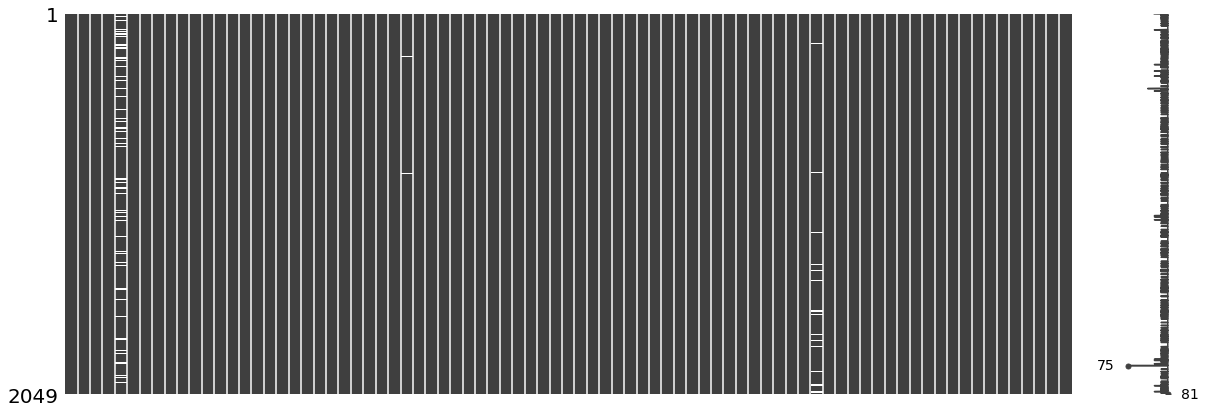

In [19]:
msno.matrix(house_train, figsize = (20,7));

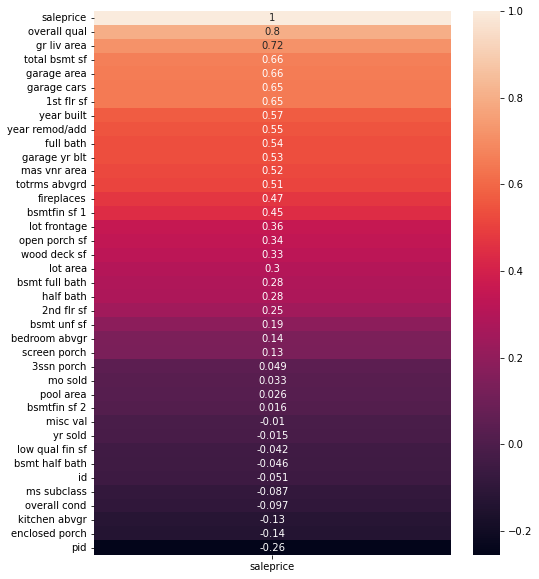

In [20]:
plt.figure(figsize=(8,10))
sns.heatmap(house_train.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False), annot = True);

## Explore Data

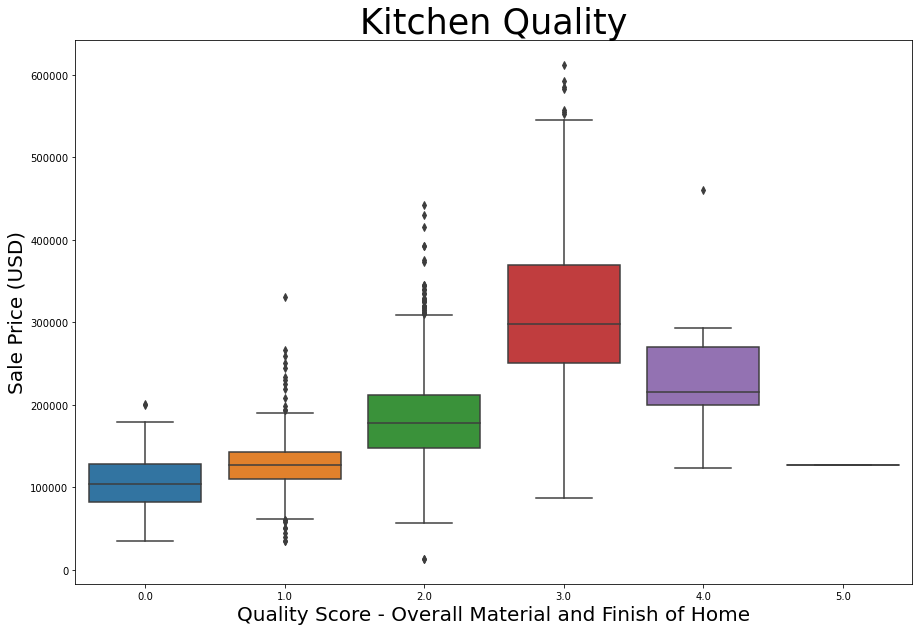

In [21]:
plt.figure(figsize = (15,10))

sns.boxplot(x = house_train['garage cars'], y = house_train['saleprice'])
plt.title('Kitchen Quality', fontsize = 35)
plt.ylabel('Sale Price (USD)', fontsize = 20)
plt.xlabel('Quality Score - Overall Material and Finish of Home', fontsize = 20);

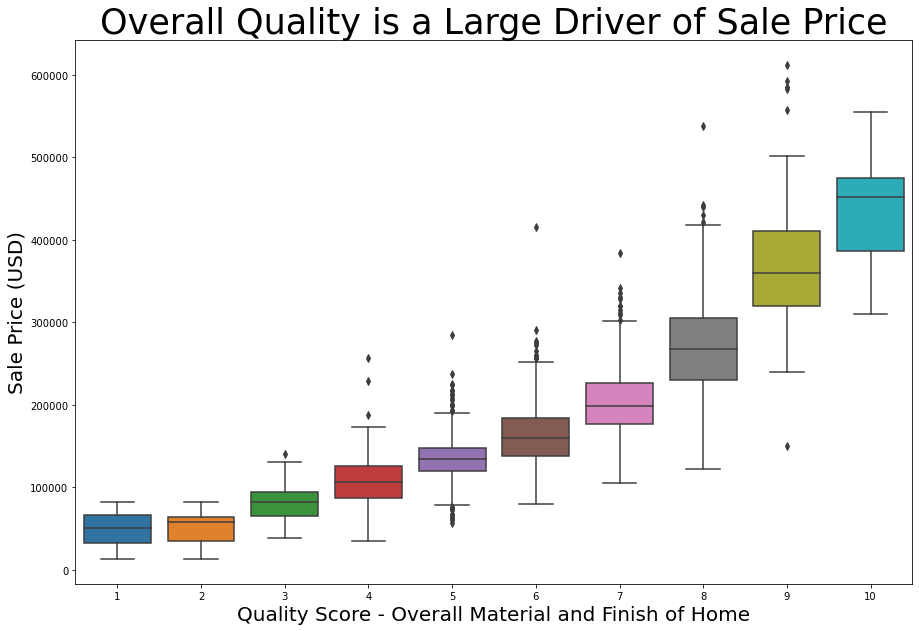

In [22]:
plt.figure(figsize = (15,10))

sns.boxplot(x = house_train['overall qual'], y = house_train['saleprice'])
plt.title('Overall Quality is a Large Driver of Sale Price', fontsize = 35)
plt.ylabel('Sale Price (USD)', fontsize = 20)
plt.xlabel('Quality Score - Overall Material and Finish of Home', fontsize = 20);

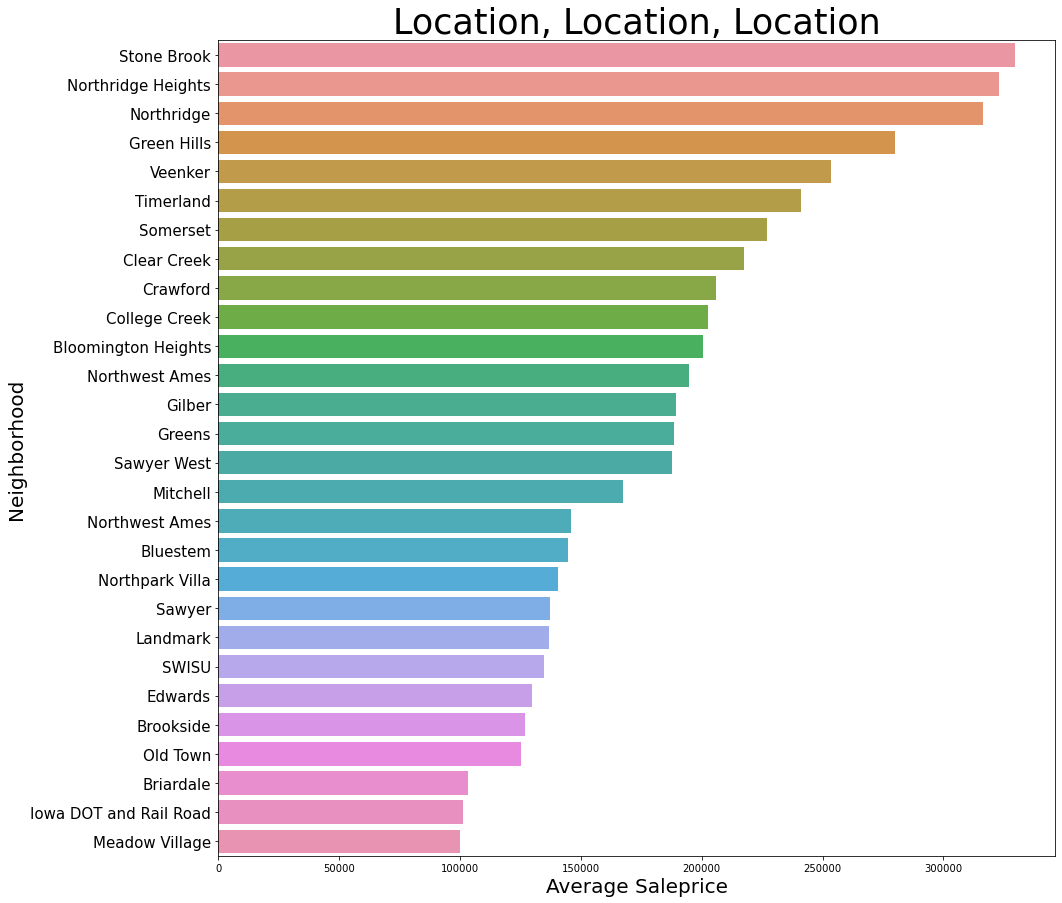

In [23]:
hood_means = pd.DataFrame(house_train.groupby(house_train['neighborhood'])['saleprice'].mean().sort_values(ascending = False)).reset_index()

plt.figure(figsize = (15,15))
plt.title('Location, Location, Location', fontsize = 35)
sns.barplot(y = hood_means['neighborhood'], x = hood_means['saleprice'])

plt.yticks(np.arange(28), ['Stone Brook','Northridge Heights','Northridge','Green Hills','Veenker', 'Timerland', 'Somerset', 'Clear Creek', 'Crawford', 'College Creek', 'Bloomington Heights', 'Northwest Ames', 'Gilber', 'Greens', 'Sawyer West', 'Mitchell', 'Northwest Ames', 'Bluestem', 'Northpark Villa', 'Sawyer', 'Landmark', 'SWISU', 'Edwards', 'Brookside', 'Old Town', 'Briardale', 'Iowa DOT and Rail Road', 'Meadow Village'], fontsize = 15);
plt.ylabel('Neighborhood', fontsize = 20)
plt.xlabel('Average Saleprice', fontsize = 20)
plt.show();

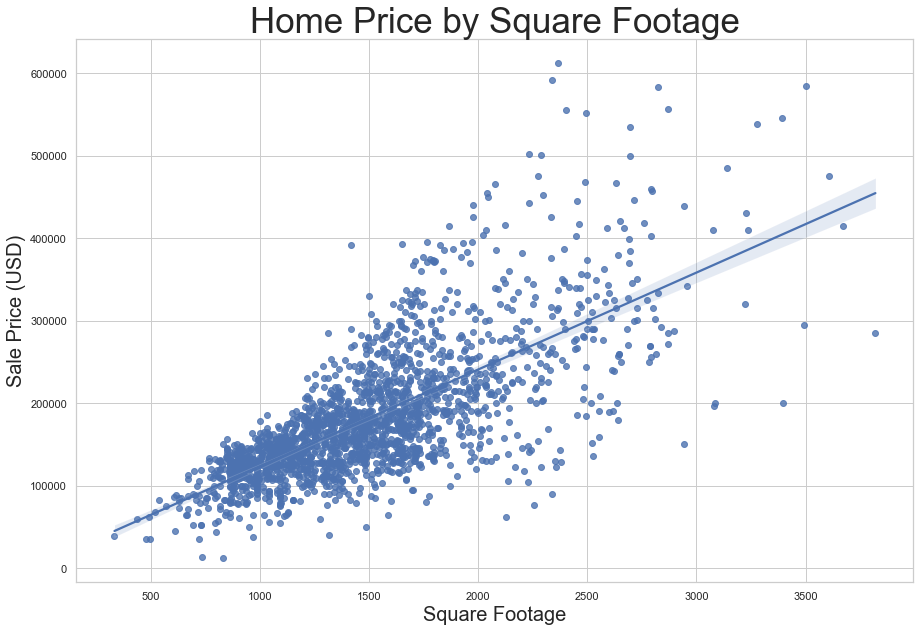

In [24]:
plt.figure(figsize = (15,10))
sns.set(style = 'whitegrid')
sns.regplot(x = house_train['gr liv area'], y = house_train['saleprice'])
plt.ylabel('Sale Price (USD)', fontsize = 20)
plt.xlabel('Square Footage', fontsize = 20)
plt.title('Home Price by Square Footage', fontsize = 35);

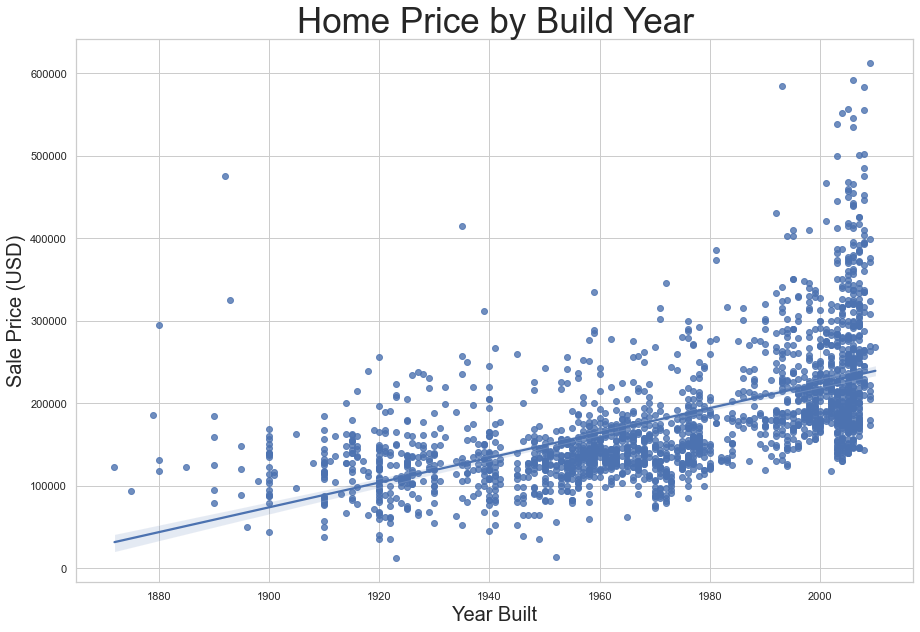

In [25]:
plt.figure(figsize = (15,10))
sns.set(style = 'whitegrid')
sns.regplot(x = house_train['year built'], y = house_train['saleprice'])
plt.ylabel('Sale Price (USD)', fontsize = 20)
plt.xlabel('Year Built', fontsize = 20)
plt.title('Home Price by Build Year', fontsize = 35);

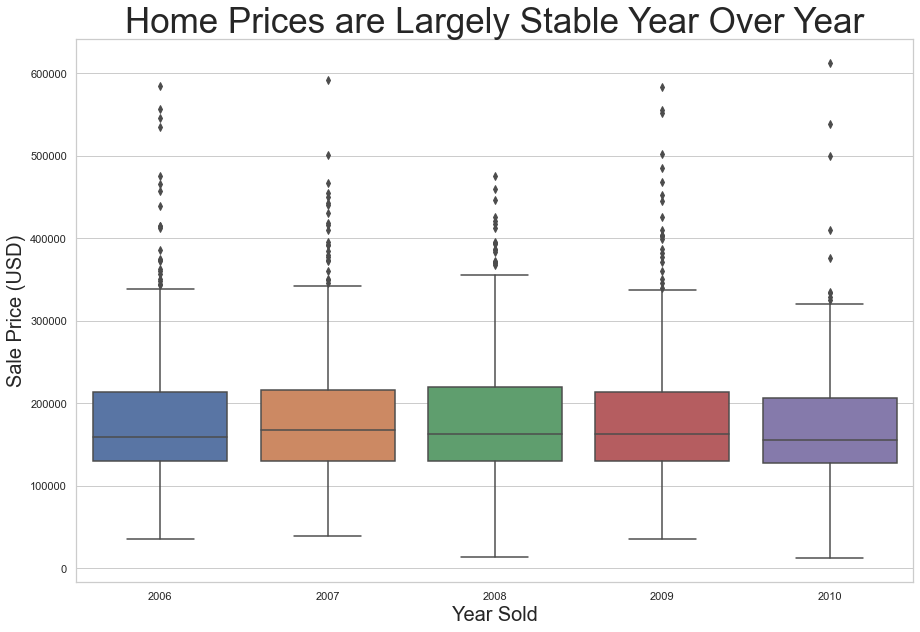

In [26]:
plt.figure(figsize = (15,10))
sns.set(style = 'whitegrid')
sns.boxplot(x = house_train['yr sold'], y = house_train['saleprice'])
plt.ylabel('Sale Price (USD)', fontsize = 20)
plt.xlabel('Year Sold', fontsize = 20)
plt.title('Home Prices are Largely Stable Year Over Year', fontsize = 35);

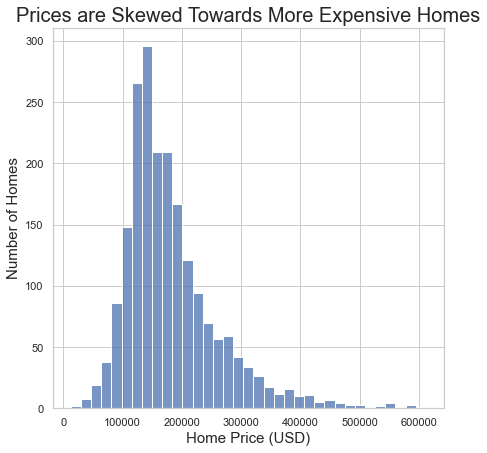

In [27]:
plt.figure(figsize = (7,7))
plt.title('Prices are Skewed Towards More Expensive Homes', fontsize = 20)
plt.ylabel('Number of Homes', fontsize = 15)
plt.xlabel('Home Price (USD)', fontsize = 15)
sns.histplot(house_train['saleprice'], bins = 35);

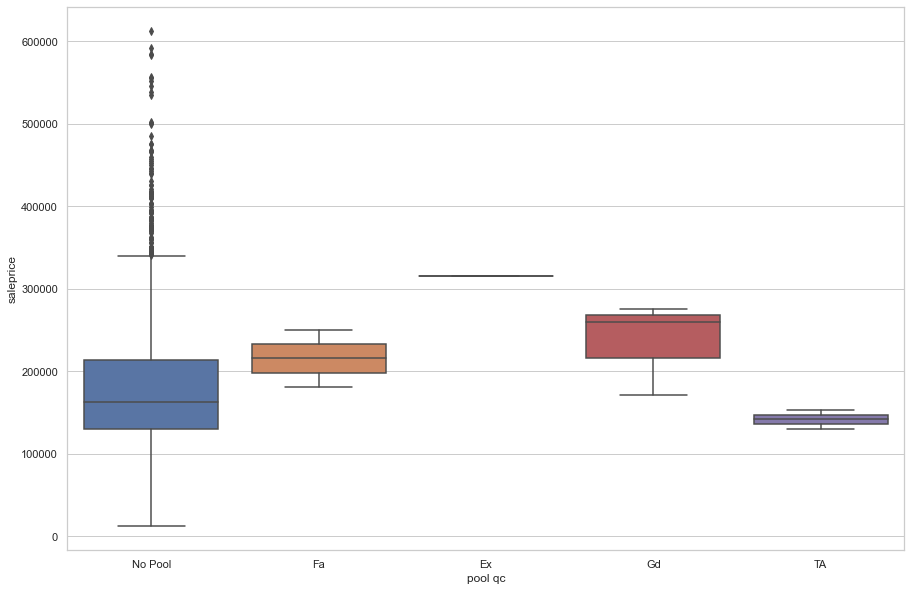

In [28]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = house_train['pool qc'], y = house_train['saleprice']);

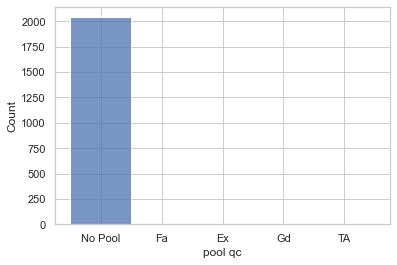

In [29]:
sns.histplot(house_train['pool qc']);

# Modeling

In [30]:
house_train['saleprice'].describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

#### Declaring X and Y variables and creating train, test split

In [31]:
X = house_train.drop(columns = 'saleprice')
y = house_train['saleprice']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Making a Pipeline to fit a Linear Regression Model

#### Ended up going with a lasso and preserving as many features as possible (~300 in total after one hot encoding) as this led to the highest test RMSE.

0.9156297549959529
The RMSE of the TRAINING data is: 18350.593499266877
The RMSE of the TEST data is: 22638.00982809503


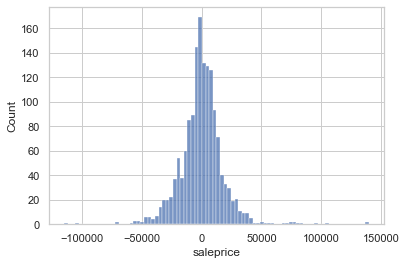

In [33]:
# Declaring X and y variables
X = house_train.drop(columns = 'saleprice')
y = house_train['saleprice']
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)
# Column transformer to be used in pipe
ct1 = make_column_transformer((OneHotEncoder(handle_unknown='ignore', sparse=False), make_column_selector(dtype_include=object)), remainder='passthrough',verbose_feature_names_out = False)
# Create data pipe
pipe = make_pipeline(ct1, StandardScaler(), SimpleImputer(strategy = 'median'), Lasso(100, max_iter = 10_000))
# Fit pipe and run regression metrics
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
print(pipe.score(X_test, y_test))
print('The RMSE of the TRAINING data is: ' + str(mean_squared_error(y_train, train_preds, squared = False)))
print('The RMSE of the TEST data is: ' + str(mean_squared_error(y_test, test_preds, squared = False)))

residuals = y_train - train_preds
sns.histplot(residuals)
plt.savefig('./charts/residuals.png');

In [34]:
y_results = pipe.predict(house_test)
house_test['SalePrice'] = pd.DataFrame(y_results)
results_csv = house_test[['id', 'SalePrice']] 
results_csv.columns = results_csv.columns.str.title()
results_csv.head(2)

,Id,Saleprice
0,2658,143029.996487
1,2718,155429.762991


In [35]:
results_csv.to_csv('./data/results_sub.csv', index = False)

### Creating a DataFrame from the Coefficients

In [36]:
coefs = pipe.named_steps['lasso'].coef_

coefs.shape

names = pipe.named_steps['columntransformer'].get_feature_names_out()
names.shape

coef_df = pd.DataFrame(coefs, index = names).sort_values(by = 0, ascending = False).reset_index()
coef_df.rename(columns = {'index': 'Feature', 0 : 'Coefficient'}, inplace = True)
coef_df.drop(index = 4, inplace = True)
coef_df.drop(index = 7, inplace = True)

In [37]:
coef_df.head(10).round()

,Feature,Coefficient
0,gr liv area,22355.0
1,total bsmt sf,10735.0
2,overall qual,9687.0
3,year built,9362.0
5,bsmt qual_Ex,5681.0
6,overall cond,5618.0
8,kitchen qual_Ex,5219.0
9,bldg type_1Fam,4797.0
10,neighborhood_StoneBr,4745.0
11,mas vnr area,4665.0


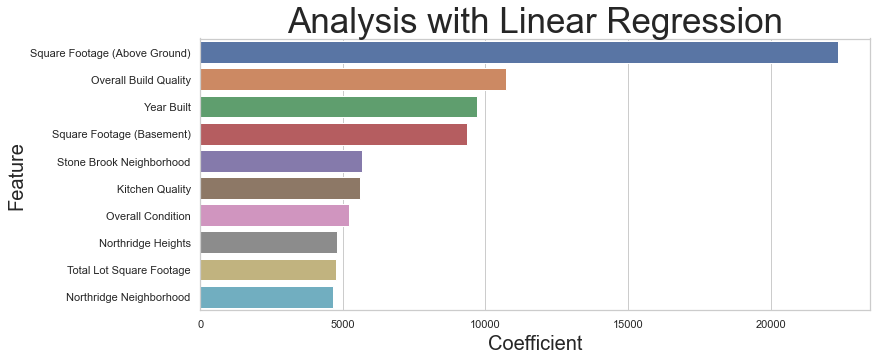

In [38]:
plt.figure(figsize = (12,5))
sns.barplot(y=coef_df['Feature'].head(10), x=coef_df['Coefficient'].head(10))
plt.ylabel('Feature', fontsize = 20)
plt.xlabel('Coefficient', fontsize = 20)
plt.title('Analysis with Linear Regression', fontsize = 35)
plt.yticks(np.arange(10), ['Square Footage (Above Ground)','Overall Build Quality','Year Built','Square Footage (Basement)','Stone Brook Neighborhood', 'Kitchen Quality', 'Overall Condition', 'Northridge Heights', 'Total Lot Square Footage', 'Northridge Neighborhood'])
plt.savefig('./charts/coefficients.png');

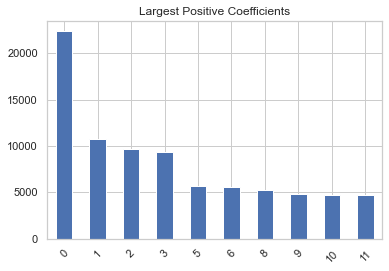

In [39]:
coef_df.head(10).plot(kind = 'bar', legend = False)
plt.title('Largest Positive Coefficients')
plt.xticks(rotation = 45);

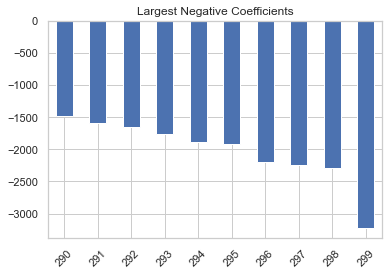

In [40]:
coef_df.tail(10).plot(kind = 'bar', legend = False)
plt.title('Largest Negative Coefficients')
plt.xticks(rotation = 45);